### Disadvantages Of Batch Gradient Descent

### 1.Slow On Big Data<br>2.Requires Large memory

# Stochastic

## having a random probability distribution or pattern that may be analysed statistically but may not be predicted precisely.


## Advantages Of Stochastic_Grdient_Descent

## 1.Faster Convergence<br>2.Low Memory use<br>3.Provides In precise solution

### In Stochastic Gradient Descent we update the vajue of y_hat on each row , while in Batch gradient Descent value is Updated when all row's computation is done<br> While We select a random row in the data for calculation

# <hr>

# Code

In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import time

In [2]:
X,y=load_diabetes(return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [6]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


## From Scratch

In [7]:
class SGDregressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_=None
        self.intercept_=None
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self,X_train,y_train):
        
        self.intercept_=0
        self.coef_=np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                #giving the number of rows
                
                #finding the random row from data 
                idx=np.random.randint(0,X_train.shape[0])
                
                y_hat=np.dot(X_train[idx],self.coef_)+self.intercept_
                
                intercept_der=-2 *(y_train[idx]-y_hat)
                self.intercept_=self.intercept_ - (self.lr*intercept_der)
                
                coef_der= -2 *np.dot((y_train[idx]-y_hat),X_train[idx])
                self.coef_=self.coef_-(self.lr*coef_der)
                
        print(self.intercept_,self.coef_)
            
    
    def predict(self,X_test):
        
        return np.dot(X_test, self.coef_)+self.intercept_
                
        

In [9]:
gdr=SGDregressor(learning_rate=0.01,epochs=40)

In [11]:
start=time.time()
gdr.fit(X_train,y_train)

print("The Time Taken is:",time.time()-start)

147.86881061849286 [  54.59839377  -54.02458991  316.21585904  226.03404641   34.34266455
   -4.12890196 -162.72513869  131.14204734  289.95863537  125.50413602]
The Time Taken is: 0.4112722873687744


In [12]:
y_pred=gdr.predict(X_test)

In [13]:
r2_score(y_test,y_pred)

0.4187406974960888

### From the above you can see that we can acieve the accuracy score as neede just in some few epochs , to gain more accuracy we need to fine tune learning rate and epochs

# <hr>

# SGD Regression using Sklearn

In [14]:
from sklearn.linear_model import SGDRegressor

In [15]:
reg=SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)
#where max_iter is Epochs and eta0 is learning rate

In [16]:
reg.fit(X_train,y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=100)

In [17]:
y_pred=reg.predict(X_test)

In [18]:
r2_score(y_test,y_pred)

0.4320674786693862

# <hr>

# Time Comparison

# Stochastic GD regression specially works on big data ,<br> if we feed the data with 100 rows to both algorithm as GD regressor and SGD regressor then GD regressor will work fast as compare to SGD regressor , that's why SGD will take more time in this data , SGD regressor will converge faster on big data , so don't be confused

# <hr>

# Visualizations

# For  Stochastic Gradient Descent

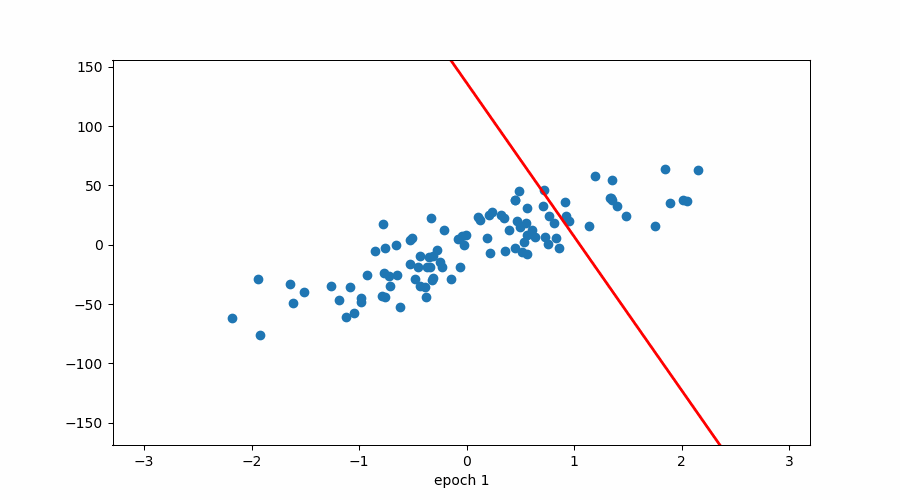

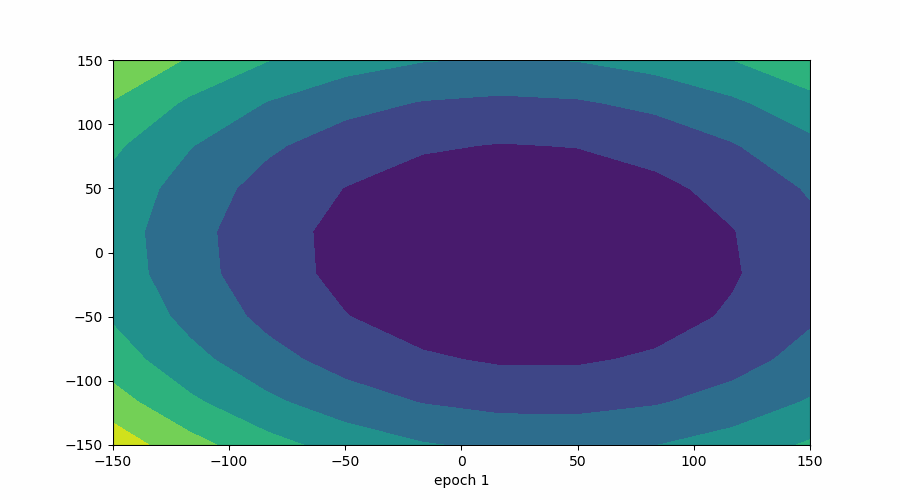

## From the above graph  you can understand that SGD regressor wil converge randomly, the above plot is about m(slope) Vs b(intercept)

## It Will choose random row in the data to best fit

## In SGD it is possible that step no. (n+1) is worse that step no. n 

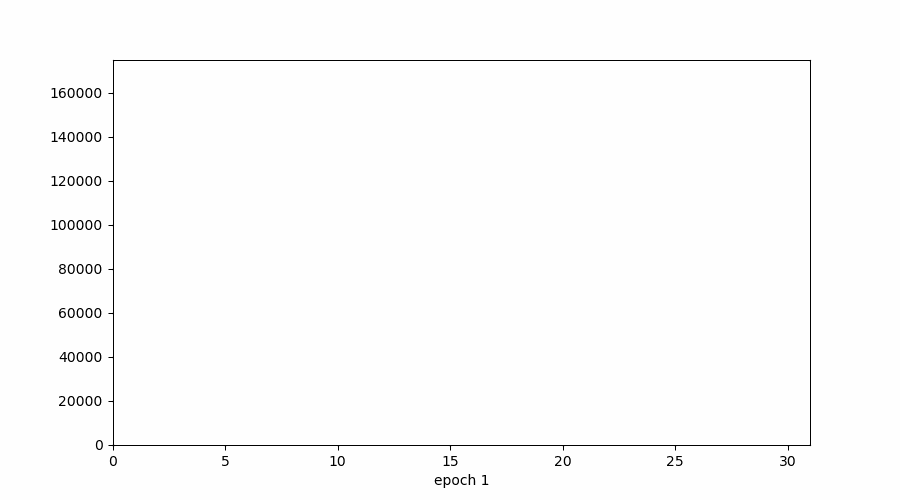

## From the above graph you can see the inconsistency and lack of confidence in cost of SGD

# <hr>

# Where to use Stochastic Gradient Descent

## 1.For Big data <br> 2. For Non-convex function

## Becuase of randomness of Stochastic Gardient Descent is it possible that it can skip the local minima in Non-convex funtion and can reach to Global Minima

# <hr>

# Learning Schedule

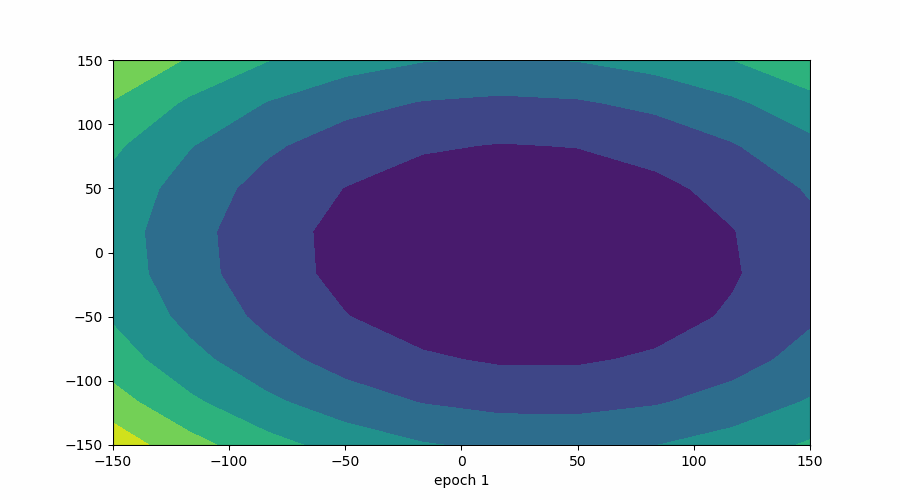

## You can see that from the above graph even if we reach the solution the SGD will still fluctuate and will not be consistent

## As we are reaching towards our goal we Method will need to reduce the learning_rate

# SO due to such Conditions We use Concept Called Learnning Schedule

## Learning Schedule means varying learning rate with respect to Epochs , make it reduce as we closer towards solution (this concept is mostly use in Deep Learning)

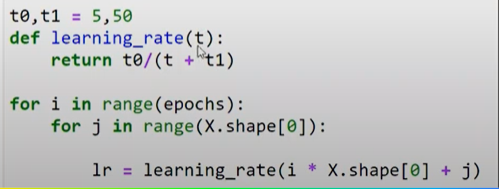

## Tha above is Code For Learning Schedule

# Conclude